# Création du dataset utilisé pour entraîner les modèles

In [1]:
# Importation des modules et packages
import shutil
import pathlib

import numpy as np
import pandas as pd

## 1 - Tomate

### 1.1 - Tomato Village dataset

In [ ]:
# Source: Tomato-Village (Multi-label classification)
tomato_village = pd.read_csv(
    "../data/Tomato-Village-main/Variant-b(MultiLabel Classification)/Multi-Label dataset - with augmented.csv"
)

# On remplace les NaN par 0
tomato_village = tomato_village.fillna(0)

tomato_village

In [ ]:
# Création d'un dataset multi-classe plutôt que multi-label
dataset = pd.DataFrame(columns=["filename", "source", "subset", "class"])

# Sélectionner les bonnes colonnes
cols = [
    "Healthy",
    "Early blight",
    "Late blight",
    "Leaf Miner",
    "Magnesium Deficiency",
    "Nitrogen Deficiency",
    "Pottassium Deficiency",
    "Spotted Wilt Virus",
]

# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "leaf_miner",
    "magnesium_deficiency",
    "nitrogen_deficiency",
    "potassium_deficiency",
    "spotted_wilt_virus",
]

tomato_village_dataset = []

for col, cls in zip(cols, classes):
    subset = tomato_village.loc[tomato_village[col] == 1]
    tmp_df = pd.DataFrame(
        {
            "filename": subset["filename"].str.replace(" ", "_"),
            "source": "tomato_village",
            "subset": None,
            "class": cls,
        }
    )
    tomato_village_dataset.append(tmp_df)

tomato_village_dataset = pd.concat(tomato_village_dataset, axis=0, ignore_index=True)
tomato_village_dataset

In [ ]:
# Show images with more than one class
tomato_village_dataset.loc[
    tomato_village_dataset.duplicated("filename", keep=False)
].sort_values("filename")

In [ ]:
# Copier les images de Tomato-Village
source = pathlib.Path(
    "../data/Tomato-Village-main/Variant-b(MultiLabel Classification)"
)
dest = pathlib.Path("tomato")

for file, sub in zip(tomato_village["filename"], tomato_village["dataset"]):
    if not (dest / file).exists():
        shutil.copy2(source / sub / file, dest / file.replace(" ", "_"))

### 1.2 - Dataset for Crop Pest and Disease Detection

On ne peut pas utiliser toutes les classes de ce dataset. Premièremente, la classe
"leaf blight" pourrait être causée par le "Early blight" ou "Late blight". Il faudrait
manuellemenet trouver les photos correspondant à chacune de ces deux divisions. Aussi,
il semble que "leaf curl" soit un symptôme qui peut être causé par plusieurs problèmes,
mais il existe un virus, le "yellow leaf curl virus" qui en est souvent la cause. On
va assumer pour ce projet que la classe "leaf curl" correspond à ce virus.

In [ ]:
# Classes
classes = [
    "healthy",
    "leaf_blight",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
    "verticulium_wilt",
]

source_classes = [
    "healthy",
    "leaf curl",
    "leaf blight",
    "septoria leaf spot",
    "verticulium wilt",
]

sets = ["test_set", "train_set"]

# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
ccmt_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path(
    "../data/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented/Tomato"
)
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    for s in sets:
        files = list((source / s / sc).iterdir())
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {"filename": filenames, "source": "ccmt", "subset": None, "class": c},
        )

        ccmt_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))


ccmt_dataset = pd.concat(ccmt_dataset, ignore_index=True)
ccmt_dataset

### 1.3 PlantDoc

In [ ]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "mosaic_virus",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
]

source_classes = [
    "Tomato leaf",
    "Tomato Early blight leaf",
    "Tomato leaf late blight",
    "Tomato leaf mosaic virus",
    "Tomato leaf yellow virus",
    "Tomato Septoria leaf spot",
]

sets = ["test", "train"]

# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantdoc_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/PlantDoc-Dataset-master")
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    for s in sets:
        files = list((source / s / sc).iterdir())
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {"filename": filenames, "source": "plantdoc", "subset": None, "class": c},
        )

        tmp_dataset = tmp_dataset.drop_duplicates()
        plantdoc_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantdoc_dataset = pd.concat(plantdoc_dataset, ignore_index=True)
plantdoc_dataset

### 1.4 - Plant village dataset
Attention à la licence CC-BY-NC-SA...

In [ ]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "mosaic_virus",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
]

source_classes = [
    "Tomato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Septoria_leaf_spot",
]


# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantvillage_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/plantvillage dataset/color/")
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "plant_village", "subset": None, "class": c},
    )

    plantvillage_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantvillage_dataset = pd.concat(plantvillage_dataset, ignore_index=True)
plantvillage_dataset

### 1.5 - Création du dataset provisoire

In [ ]:
# Concaténation des dataframes
dataset = [tomato_village_dataset, ccmt_dataset, plantdoc_dataset, plantvillage_dataset]

dataset = pd.concat(dataset, axis=0, ignore_index=True)
dataset

In [ ]:
# Drop duplicates and export
dataset = dataset.drop_duplicates()
dataset.to_csv("tomato_dataset.csv")

### 1.6 - Analyse du dataset

In [ ]:
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset.csv", index_col=0)

In [ ]:
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()

sources = ["ccmt", "plantdoc", "plant_village", "tomato_village"]

counts = (
    dataset[["source", "class"]]
    .groupby("source")
    .value_counts()
    .unstack(1, fill_value=0)
    .loc[sources, classes]
)
counts

In [ ]:
# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset.png", dpi=300, bbox_inches="tight")

In [ ]:
# Random number generator
rng = np.random.default_rng(3456789012)

size = 10
# fig, axes = plt.subplots(size, 12, figsize=(30, 20))

# dataset.query("healthy == 1")
path = pathlib.Path("tomato")

colors = {
    "ccmt": "tab:blue",
    "plantdoc": "tab:orange",
    "plant_village": "tab:green",
    "tomato_village": "tab:red",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15), layout="tight")
    subset = dataset.loc[dataset["class"] == cls]
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)

        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"analyse/tomato_sample_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

### 1.7 - Équilibrage et nettoyage des données

Il semble que le dataset CCMT est le seul à être déjà augmenté. Comme on va procéder
à l'augmentation durant l'entraînement (via le pipeline), on va plutôt utiliser les images
brutes. De plus, comme on fait notre propre séparation entre les données d'entraînement
et de test, on doit éviter d'avoir la même image dans les deux jeux de données, même
si l'augmentation est différente.

Aussi, on va exclure les images de PlantDoc car elles proviennent de Web Scraping et
contiennent une forte proportion d'images invalides...

In [ ]:
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import pathlib
import shutil

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset.csv", index_col=0)
dataset

On enlève les images augmentées de Tomato Village.

In [ ]:
dataset = dataset.loc[
    ~((dataset["source"] == "tomato_village") & (dataset["filename"].str.contains("_")))
]
dataset

On va enlever les images qui ne présentent qu'une déficience en potassium car il y en a
trop peu (72 images). On garde cependant les images qui ont une autre classe en plus
de la déficience.

In [ ]:
# Images qui ont une déficience en potassium et aucune autre condition
dataset = dataset.loc[dataset["class"] != "potassium_deficiency"]

On enlève les doublons de Tomato Village.

In [ ]:
dataset = dataset.drop_duplicates("filename", keep=False)

On enlève les images du dataset PlantDoc et on met à jour le fichier csv du dataset.

In [ ]:
# Remove plantdoc from dataset
dataset = dataset.query("source != 'plantdoc'")

On enlève les images du CCMT augmenté. Lorsqu'on ajoutera les images du CCMT brut, on
va éviter de mettre les images de type "leaf curl", car elles sont très différentes
des images du yellow leaf curl virus. Il semble donc que le CCMT utilise des images
du symptôme du leaf curl. On enlève aussi le "leaf blight", qui peut être causé par
plusieurs champignons...

In [ ]:
# Remove ccmt from dataset
dataset = dataset.query("source != 'ccmt'")

In [ ]:
# Classes
classes = [
    "healthy",
    "septoria_leaf_spot",
    "verticillium_wilt",
]

source_classes = ["healthy", "septoria leaf spot", "verticulium wilt"]

# On ajoute les images RAW du CCMT
source = pathlib.Path(
    "../data/Dataset for Crop Pest and Disease Detection/Raw Data/CCMT Dataset/Tomato/"
)

dest = pathlib.Path("tomato")

ccmt_raw_dataset = []

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "ccmt", "subset": None, "class": c},
    )

    ccmt_raw_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))

ccmt_raw_dataset = pd.concat(ccmt_raw_dataset, ignore_index=True)
ccmt_raw_dataset

In [ ]:
# On concatène le nouveau dataset
dataset = pd.concat([dataset, ccmt_raw_dataset], ignore_index=True)

In [ ]:
# On regarde le nombre de fichiers
len(dataset["filename"].unique())

On s'assure maintenant que le dossier "tomato" contient bien toutes les images du dataset,
et uniquement les images du dataset.

In [ ]:
## On enlève les images du dossier qui ne sont plus dans le dataset
dataset_path = pathlib.Path("tomato")
dataset_files = dataset["filename"].values

for file in dataset_path.iterdir():
    if file.name not in dataset_files:
        file.unlink()

In [ ]:
# On vérifie si toutes les images du dataset sont présentes dans le dossier
for file in dataset["filename"]:
    absent_files = []
    if not (dataset_path / file).exists():
        absent_files.append(file)

absent_files

In [ ]:
# On retire les images qui ne peuvent pas être ouvertes
to_remove = []
for file in dataset["filename"]:
    try:
        PIL.Image.open(dataset_path / file).convert("RGB")
    except:
        to_remove.append(file)
        (dataset_path / file).unlink()

dataset = dataset.loc[~dataset["filename"].isin(to_remove)]
to_remove

In [ ]:
dataset.to_csv("tomato_dataset_clean.csv")
dataset

### 1.8 - Analyse du dataset nettoyé

In [ ]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset_clean.csv", index_col=0)

In [ ]:
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()

sources = ["ccmt", "plant_village", "tomato_village"]

counts = (
    dataset[["source", "class"]]
    .groupby("source")
    .value_counts()
    .unstack(1, fill_value=0)
    .loc[sources, classes]
)
counts

In [ ]:
# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset_clean.png", dpi=300, bbox_inches="tight")

In [ ]:
# Random number generator
rng = np.random.default_rng(7654321098)

size = 10
# fig, axes = plt.subplots(size, 12, figsize=(30, 20))

# dataset.query("healthy == 1")
path = pathlib.Path("tomato")

colors = {
    "ccmt": "tab:blue",
    # "plantdoc": "tab:orange",
    "plant_village": "tab:green",
    "tomato_village": "tab:red",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(5, 5, figsize=(12, 12), layout="tight")
    subset = dataset.loc[dataset["class"] == cls]
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)

        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"analyse/tomato_sample_clean_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

### 1.9 - Séparation du dataset de test et d'entraînement

In [61]:
# Random number generator
import sklearn
import pandas as pd

dataset = pd.read_csv("tomato_dataset_clean.csv", index_col=0)
dataset["subset"] = dataset["subset"].astype(str)
classes = dataset.columns.drop(["filename", "source"])

prop_test = 0.3

train_files, test_files = sklearn.model_selection.train_test_split(
    dataset["filename"],
    test_size=prop_test,
    shuffle=True,
    random_state=432109765,
    stratify=dataset.drop("filename", axis=1),
)

dataset.loc[dataset["filename"].isin(train_files), "subset"] = "train"
dataset.loc[dataset["filename"].isin(test_files), "subset"] = "test"

train_dataset = dataset.query("subset == 'train'")
test_dataset = dataset.query("subset == 'test'")
test_dataset

,filename,source,subset,class
1,IMG20220324113314.jpg,tomato_village,test,healthy
20,IMG20220325142117.jpg,tomato_village,test,healthy
23,IMG20220323103145.jpg,tomato_village,test,healthy
24,IMG20220323103935.jpg,tomato_village,test,healthy
40,IMG20220324110914.jpg,tomato_village,test,healthy
...,...,...,...,...
18080,verticulium_wilt747_.jpg,ccmt,test,verticillium_wilt
18081,verticulium_wilt748_.jpg,ccmt,test,verticillium_wilt
18085,verticulium_wilt752_.jpg,ccmt,test,verticillium_wilt
18086,verticulium_wilt753_.jpg,ccmt,test,verticillium_wilt


On valide les proportions des classes et sources de chacun des sous-datasets.

In [ ]:
# Entraînement
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()
sources = ["ccmt", "plant_village", "tomato_village"]

counts = (
    train_dataset[["source", "class"]]
    .groupby("source")
    .value_counts()
    .unstack(1, fill_value=0)
    .loc[sources, classes]
)

# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset_clean_train.png", dpi=300, bbox_inches="tight")

In [ ]:
# Test
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()
sources = ["ccmt", "plant_village", "tomato_village"]

counts = (
    test_dataset[["source", "class"]]
    .groupby("source")
    .value_counts()
    .unstack(1, fill_value=0)
    .loc[sources, classes]
)

# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset_clean_test.png", dpi=300, bbox_inches="tight")

In [ ]:
# Export to csv
dataset.to_csv("tomato_dataset_clean_split.csv")

dataset

## 2 - Tomate (2025-03-20)

### 2.1 - Tomato Village

In [12]:
# Classes
classes = [
    "early_blight",
    "healthy",
    "late_blight",
    "leaf_miner",
    "nutrient_deficiency",
    "nutrient_deficiency",
    "nutrient_deficiency",
    "spotted_wilt_virus",
]

source_classes = [
    "Early_blight",
    "Healthy",
    "Late_blight",
    "Leaf Miner",
    "Magnesium Deficiency",
    "Nitrogen Deficiency",
    "Pottassium Deficiency",
    "Spotted Wilt Virus",
]

# On ajoute les images RAW du CCMT
source = pathlib.Path(
    "../data/Tomato-Village-main/Variant-a(Multiclass Classification)/"
)

dest = pathlib.Path("tomato")

sets = ["test", "train", "val"]

tomato_village_dataset = []

for c, sc in zip(classes, source_classes):
    for st in sets:
        # Liste des fichiers, et on enlève les "_" car ce sont des images augmentées
        files = [f for f in list((source / st / sc).iterdir()) if "_" not in f.name]
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {"filename": filenames, "source": "tomato_village", "subset": None, "class": c},
        )

        tomato_village_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))

tomato_village_dataset = pd.concat(tomato_village_dataset, ignore_index=True)
tomato_village_dataset

,filename,source,subset,class
0,IMG20220323104920.jpg,tomato_village,None,early_blight
1,IMG20220323132208.jpg,tomato_village,None,early_blight
2,IMG20220323183239.jpg,tomato_village,None,early_blight
3,IMG20220324121417.jpg,tomato_village,None,early_blight
4,IMG20220324175323.jpg,tomato_village,None,early_blight
...,...,...,...,...
2099,IMG20220325121217.jpg,tomato_village,None,spotted_wilt_virus
2100,IMG20220325133424.jpg,tomato_village,None,spotted_wilt_virus
2101,IMG20220325134421.jpg,tomato_village,None,spotted_wilt_virus
2102,IMG20220325140005.jpg,tomato_village,None,spotted_wilt_virus


### 2.2 - Dataset for Crop pest and Disease Detection

In [13]:
# Classes
classes = [
    "healthy",
    "septoria_leaf_spot",
    "verticillium_wilt",
]

source_classes = ["healthy", "septoria leaf spot", "verticulium wilt"]

# On ajoute les images RAW du CCMT
source = pathlib.Path(
    "../data/Dataset for Crop Pest and Disease Detection/Raw Data/CCMT Dataset/Tomato/"
)

dest = pathlib.Path("tomato")

ccmt_raw_dataset = []

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "ccmt", "subset": None, "class": c},
    )

    ccmt_raw_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))

ccmt_raw_dataset = pd.concat(ccmt_raw_dataset, ignore_index=True)
ccmt_raw_dataset

,filename,source,subset,class
0,healthy100_.jpg,ccmt,None,healthy
1,healthy101_.jpg,ccmt,None,healthy
2,healthy102_.jpg,ccmt,None,healthy
3,healthy103_.jpg,ccmt,None,healthy
4,healthy104_.jpg,ccmt,None,healthy
...,...,...,...,...
3981,verticulium_wilt754_.jpg,ccmt,None,verticillium_wilt
3982,verticulium_wilt757_.jpg,ccmt,None,verticillium_wilt
3983,verticulium_wilt758_.jpg,ccmt,None,verticillium_wilt
3984,verticulium_wilt759_.jpg,ccmt,None,verticillium_wilt


### 2.3 - Plant Village

In [14]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "mosaic_virus",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
]

source_classes = [
    "Tomato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Septoria_leaf_spot",
]


# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantvillage_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/plantvillage dataset/color/")
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "plant_village", "subset": None, "class": c},
    )

    plantvillage_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantvillage_dataset = pd.concat(plantvillage_dataset, ignore_index=True)
plantvillage_dataset

,filename,source,subset,class
0,000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL_L...,plant_village,None,healthy
1,000bf685-b305-408b-91f4-37030f8e62db___GH_HL_L...,plant_village,None,healthy
2,0031da2a-8edd-468f-a8b1-106657717a32___RS_HL_0...,plant_village,None,healthy
3,003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL_9...,plant_village,None,healthy
4,00bce074-967b-4d50-967a-31fdaa35e688___RS_HL_0...,plant_village,None,healthy
...,...,...,...,...
11996,ffbb4b17-6760-48fd-bbfa-70120a53db86___Matt.S_...,plant_village,None,septoria_leaf_spot
11997,ffcd08b6-6533-422a-a365-271e11890f98___Matt.S_...,plant_village,None,septoria_leaf_spot
11998,ffd3c6f3-17d3-45f1-a599-2623e111ec71___Matt.S_...,plant_village,None,septoria_leaf_spot
11999,ffe98ff9-be33-4e8f-82f0-7b7c21b02958___JR_Sept...,plant_village,None,septoria_leaf_spot


### 2.4 - NZDL Plant Disease Dataset v2

In [22]:
# Classes
classes = [
    "healthy",
    "late_blight"
]

source_classes = [
    "T_healthy_l",
    "T_l_blight"
]

# On ajoute les images RAW du CCMT
source = pathlib.Path(
    "../data/NZDLPlantDiseaseDatasetV2/"
)

dest = pathlib.Path("tomato")

sets = ["test", "train", "valid"]

nzdl_dataset = []

for c, sc in zip(classes, source_classes):
    for st in sets:
        # Liste des fichiers, et on enlève les "_" car ce sont des images augmentées
        files = [f for f in list((source / st / sc / "original").iterdir()) if f.suffix == ".jpg"]
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {"filename": filenames, "source": "nzdl", "subset": None, "class": c},
        )

        nzdl_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))

nzdl_dataset = pd.concat(nzdl_dataset, ignore_index=True)
nzdl_dataset

,filename,source,subset,class
0,T_healthy_l_(2201).jpg,nzdl,None,healthy
1,T_healthy_l_(2202).jpg,nzdl,None,healthy
2,T_healthy_l_(2203).jpg,nzdl,None,healthy
3,T_healthy_l_(2204).jpg,nzdl,None,healthy
4,T_healthy_l_(2205).jpg,nzdl,None,healthy
...,...,...,...,...
348,T_l_blight_(1365).jpg,nzdl,None,late_blight
349,T_l_blight_(1366).jpg,nzdl,None,late_blight
350,T_l_blight_(1367).jpg,nzdl,None,late_blight
351,T_l_blight_(1368).jpg,nzdl,None,late_blight


### 2.5 - Création du dataset

In [23]:
# Concaténation des dataframes
dataset = [tomato_village_dataset, ccmt_raw_dataset, plantvillage_dataset, nzdl_dataset]

dataset = pd.concat(dataset, axis=0, ignore_index=True)
dataset

,filename,source,subset,class
0,IMG20220323104920.jpg,tomato_village,None,early_blight
1,IMG20220323132208.jpg,tomato_village,None,early_blight
2,IMG20220323183239.jpg,tomato_village,None,early_blight
3,IMG20220324121417.jpg,tomato_village,None,early_blight
4,IMG20220324175323.jpg,tomato_village,None,early_blight
...,...,...,...,...
18439,T_l_blight_(1365).jpg,nzdl,None,late_blight
18440,T_l_blight_(1366).jpg,nzdl,None,late_blight
18441,T_l_blight_(1367).jpg,nzdl,None,late_blight
18442,T_l_blight_(1368).jpg,nzdl,None,late_blight


On s'assure maintenant que le dossier "tomato" contient bien toutes les images du dataset,
et uniquement les images du dataset.

In [24]:
## On enlève les images du dossier qui ne sont plus dans le dataset
dataset_path = pathlib.Path("tomato")
dataset_files = dataset["filename"].values

for file in dataset_path.iterdir():
    if file.name not in dataset_files:
        file.unlink()

In [25]:
# On vérifie si toutes les images du dataset sont présentes dans le dossier
for file in dataset["filename"]:
    absent_files = []
    if not (dataset_path / file).exists():
        absent_files.append(file)

absent_files

[]

In [27]:
# On retire les images qui ne peuvent pas être ouvertes
import PIL.Image

to_remove = []
for file in dataset["filename"]:
    try:
        PIL.Image.open(dataset_path / file).convert("RGB")
    except:
        to_remove.append(file)
        if (dataset_path / file).exists():
            (dataset_path / file).unlink()

dataset = dataset.loc[~dataset["filename"].isin(to_remove)]
len(to_remove)

0

In [28]:
# On exporte le dataset
dataset.to_csv("tomato_dataset_v2.csv")
dataset

,filename,source,subset,class
0,IMG20220323104920.jpg,tomato_village,None,early_blight
1,IMG20220323132208.jpg,tomato_village,None,early_blight
2,IMG20220323183239.jpg,tomato_village,None,early_blight
3,IMG20220324121417.jpg,tomato_village,None,early_blight
4,IMG20220324175323.jpg,tomato_village,None,early_blight
...,...,...,...,...
18439,T_l_blight_(1365).jpg,nzdl,None,late_blight
18440,T_l_blight_(1366).jpg,nzdl,None,late_blight
18441,T_l_blight_(1367).jpg,nzdl,None,late_blight
18442,T_l_blight_(1368).jpg,nzdl,None,late_blight


### 2.6 - Analyse du dataset

In [31]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset_v2.csv", index_col=0)
dataset

,filename,source,subset,class
0,IMG20220323104920.jpg,tomato_village,NaN,early_blight
1,IMG20220323132208.jpg,tomato_village,NaN,early_blight
2,IMG20220323183239.jpg,tomato_village,NaN,early_blight
3,IMG20220324121417.jpg,tomato_village,NaN,early_blight
4,IMG20220324175323.jpg,tomato_village,NaN,early_blight
...,...,...,...,...
18439,T_l_blight_(1365).jpg,nzdl,NaN,late_blight
18440,T_l_blight_(1366).jpg,nzdl,NaN,late_blight
18441,T_l_blight_(1367).jpg,nzdl,NaN,late_blight
18442,T_l_blight_(1368).jpg,nzdl,NaN,late_blight


In [32]:
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()

sources = ["tomato_village", "ccmt", "plant_village", "nzdl"]

counts = (
    dataset[["source", "class"]]
    .groupby("source")
    .value_counts()
    .unstack(1, fill_value=0)
    .loc[sources, classes]
)
counts

class,early_blight,healthy,late_blight,leaf_miner,nutrient_deficiency,spotted_wilt_virus,septoria_leaf_spot,verticillium_wilt,mosaic_virus,yellow_leaf_curl_virus
source,,,,,,,,,,
tomato_village,62,216,113,1024,171,517,0,0,0,0
ccmt,0,466,0,0,0,0,2743,772,0,0
plant_village,1000,1591,1909,0,0,0,1771,0,373,5357
nzdl,0,220,133,0,0,0,0,0,0,0


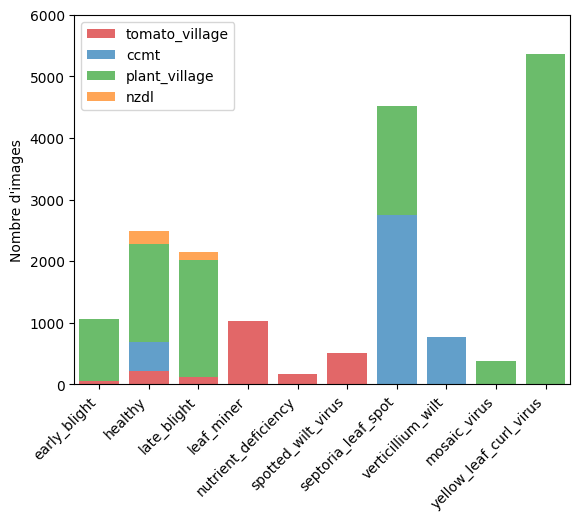

In [34]:
# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:red", "tab:blue", "tab:green", "tab:orange"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset_v2.png", dpi=300, bbox_inches="tight")

In [36]:
# Random number generator
rng = np.random.default_rng(3456789012)

size = 10

path = pathlib.Path("tomato")

colors = {
    "tomato_village": "tab:red",
    "ccmt": "tab:blue",
    "plant_village": "tab:green",
    "nzdl": "tab:orange",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15), layout="tight")
    subset = dataset.loc[dataset["class"] == cls]
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)

        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"analyse/tomato_v2_sample_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

### 2.7 - Séparation du dataset d'entraînement et de test

In [55]:
# Random number generator
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("tomato_dataset_v2.csv", index_col=0)
dataset["subset"] = dataset["subset"].astype(str)
classes = dataset.columns.drop(["filename", "source"])

prop_test = 0.3

train_files, test_files = sklearn.model_selection.train_test_split(
    dataset["filename"],
    test_size=prop_test,
    shuffle=True,
    random_state=432109765,
    stratify=dataset.drop("filename", axis=1),
)

dataset.loc[dataset["filename"].isin(train_files), "subset"] = "train"
dataset.loc[dataset["filename"].isin(test_files), "subset"] = "test"

train_dataset = dataset.query("subset == 'train'")
test_dataset = dataset.query("subset == 'test'")
test_dataset

,filename,source,subset,class
0,IMG20220323104920.jpg,tomato_village,test,early_blight
7,IMG20220323102220.jpg,tomato_village,test,early_blight
12,IMG20220323103125.jpg,tomato_village,test,early_blight
15,IMG20220323104634.jpg,tomato_village,test,early_blight
18,IMG20220323110739.jpg,tomato_village,test,early_blight
...,...,...,...,...
18422,T_l_blight_(1348).jpg,nzdl,test,late_blight
18428,T_l_blight_(1354).jpg,nzdl,test,late_blight
18438,T_l_blight_(1364).jpg,nzdl,test,late_blight
18440,T_l_blight_(1366).jpg,nzdl,test,late_blight


In [56]:
# Export to csv
dataset.to_csv("tomato_dataset_v2.csv")

dataset

,filename,source,subset,class
0,IMG20220323104920.jpg,tomato_village,test,early_blight
1,IMG20220323132208.jpg,tomato_village,train,early_blight
2,IMG20220323183239.jpg,tomato_village,train,early_blight
3,IMG20220324121417.jpg,tomato_village,train,early_blight
4,IMG20220324175323.jpg,tomato_village,train,early_blight
...,...,...,...,...
18439,T_l_blight_(1365).jpg,nzdl,train,late_blight
18440,T_l_blight_(1366).jpg,nzdl,test,late_blight
18441,T_l_blight_(1367).jpg,nzdl,test,late_blight
18442,T_l_blight_(1368).jpg,nzdl,train,late_blight


## 3 - Maïs

### 3.1 - Dataset for Crop Pest and Disease Detection

In [33]:
# Classes
classes = [
    "healthy",
    "leaf_spot",
    "leaf_blight",
    "streak_virus",
]

source_classes = ["healthy", "leaf spot", "leaf blight", "streak virus"]

# On ajoute les images RAW du CCMT
source = pathlib.Path(
    "../data/Dataset for Crop Pest and Disease Detection/Raw Data/CCMT Dataset/Maize/"
)

dest = pathlib.Path("corn")

ccmt_raw_dataset = []

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "ccmt", "subset": None, "class": c},
    )

    ccmt_raw_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))

ccmt_raw_dataset = pd.concat(ccmt_raw_dataset, ignore_index=True)
ccmt_raw_dataset

,filename,source,subset,class
0,healthy100_.jpg,ccmt,None,healthy
1,healthy102_.jpg,ccmt,None,healthy
2,healthy101_.jpg,ccmt,None,healthy
3,healthy103_.jpg,ccmt,None,healthy
4,healthy104_.jpg,ccmt,None,healthy
...,...,...,...,...
3447,streak_virus998_.jpg,ccmt,None,streak_virus
3448,streak_virus997_.jpg,ccmt,None,streak_virus
3449,streak_virus999_.jpg,ccmt,None,streak_virus
3450,streak_virus99_.jpg,ccmt,None,streak_virus


### 3.2 - Plant Village

In [34]:
# Classes
classes = [
    "leaf_spot",
    "common_rust",
    "healthy",
    "leaf_blight",
]

source_classes = [
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___healthy",
    "Corn_(maize)___Northern_Leaf_Blight",
]


# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantvillage_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/plantvillage dataset/color/")
dest = pathlib.Path("corn")

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "plant_village", "subset": None, "class": c},
    )

    plantvillage_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantvillage_dataset = pd.concat(plantvillage_dataset, ignore_index=True)
plantvillage_dataset

,filename,source,subset,class
0,00120a18-ff90-46e4-92fb-2b7a10345bd3___RS_GLSp...,plant_village,None,leaf_spot
1,00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp...,plant_village,None,leaf_spot
2,0140764c-6157-4995-9ada-9c10b81af3b8___RS_GLSp...,plant_village,None,leaf_spot
3,0157de0c-5b81-44a1-abe8-eecaa6f1261a___RS_GLSp...,plant_village,None,leaf_spot
4,01a02916-5d4c-4256-936b-6b1a9ee65b11___RS_GLSp...,plant_village,None,leaf_spot
...,...,...,...,...
3847,fed381d0-4407-4ec5-a178-d70ec1ca93d3___RS_NLB_...,plant_village,None,leaf_blight
3848,ff1721eb-609e-4476-983d-a372b7469ab0___RS_NLB_...,plant_village,None,leaf_blight
3849,ff8577c3-ad10-4272-84f6-b7c6d6042d1f___RS_NLB_...,plant_village,None,leaf_blight
3850,ffa82f14-8320-469b-a621-6475c92a4bb8___RS_NLB_...,plant_village,None,leaf_blight


### 3.3 - Maizecraze

In [35]:
# On load le fichier csv
df = pd.read_csv("../data/maizecraze/Database.csv")
df

,imgID_id,filePath,GLS,NCLB,PLS,CR,SR,NoFoliarSymptoms,Other,UnidentifiedDisease
0,1207,100_CIMG3835_1-135-2.JPG,1,0,0,0,0,0,0,0
1,1122,101_CIMG3836_1-49-1.JPG,1,0,0,0,0,0,0,0
2,1168,102_CIMG3837_1-49-2.JPG,1,0,0,0,0,0,0,0
3,1013,103_CIMG3838_1-43-1.JPG,1,0,0,0,0,0,0,0
4,1214,104_CIMG3839_1-43-2.JPG,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2350,2298,IMG_20200323_103947.jpg,1,0,0,0,0,0,0,0
2351,2310,IMG_20200323_103955.jpg,1,0,1,0,0,0,0,0
2352,2326,IMG_20200323_104004.jpg,1,0,0,0,0,0,0,0
2353,2279,IMG_20200323_104007.jpg,1,0,1,0,0,0,0,0


In [36]:
# On enlève les images avec plusieurs labels
classes = [
    "GLS",
    "NCLB",
    "PLS",
    "CR",
    "SR",
    "NoFoliarSymptoms",
]

single_labels = df[classes].sum(axis=1) == 1
df = df[single_labels]
df

,imgID_id,filePath,GLS,NCLB,PLS,CR,SR,NoFoliarSymptoms,Other,UnidentifiedDisease
0,1207,100_CIMG3835_1-135-2.JPG,1,0,0,0,0,0,0,0
1,1122,101_CIMG3836_1-49-1.JPG,1,0,0,0,0,0,0,0
2,1168,102_CIMG3837_1-49-2.JPG,1,0,0,0,0,0,0,0
3,1013,103_CIMG3838_1-43-1.JPG,1,0,0,0,0,0,0,0
4,1214,104_CIMG3839_1-43-2.JPG,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2346,2342,IMG_20200323_103820.jpg,1,0,0,0,0,0,0,0
2349,2365,IMG_20200323_103940.jpg,1,0,0,0,0,0,0,0
2350,2298,IMG_20200323_103947.jpg,1,0,0,0,0,0,0,0
2352,2326,IMG_20200323_104004.jpg,1,0,0,0,0,0,0,0


In [37]:
# Classes
classes = [
    "leaf_spot",
    "leaf_blight",
    "leaf_spot",
    "common_rust",
    "healthy",
]

source_classes = [
    "GLS",
    "NCLB",
    "PLS",
    "CR",
    "NoFoliarSymptoms",
]

maizecraze_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/maizecraze/leaf_images/")
dest = pathlib.Path("corn")

for c, sc in zip(classes, source_classes):
    files = [source / f for f in df.loc[df[sc] == 1, "filePath"]]
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "maizecraze", "subset": None, "class": c},
    )

    maizecraze_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))


maizecraze_dataset = pd.concat(maizecraze_dataset, ignore_index=True)
maizecraze_dataset

,filename,source,subset,class
0,100_CIMG3835_1-135-2.JPG,maizecraze,None,leaf_spot
1,101_CIMG3836_1-49-1.JPG,maizecraze,None,leaf_spot
2,102_CIMG3837_1-49-2.JPG,maizecraze,None,leaf_spot
3,103_CIMG3838_1-43-1.JPG,maizecraze,None,leaf_spot
4,104_CIMG3839_1-43-2.JPG,maizecraze,None,leaf_spot
...,...,...,...,...
1572,20200309_103456.jpg,maizecraze,None,healthy
1573,20200309_103458.jpg,maizecraze,None,healthy
1574,20200309_103507.jpg,maizecraze,None,healthy
1575,20200309_103533.jpg,maizecraze,None,healthy


### 3.4 CD&S Dataset

In [43]:
# Classes
classes = [
    "leaf_spot",
    "leaf_blight",
    "leaf_spot",
]

source_classes = [
    "gls",
    "nlb",
    "nls",
]

sets = ["test", "train"]

# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
cds_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/CD&S_Dataset_Original")
dest = pathlib.Path("corn")

for c, sc in zip(classes, source_classes):
    for s in sets:
        files = list((source / s / sc).iterdir())
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {"filename": filenames, "source": "cd&s", "subset": None, "class": c},
        )

        tmp_dataset = tmp_dataset.drop_duplicates()
        cds_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))


cds_dataset = pd.concat(cds_dataset, ignore_index=True)
cds_dataset

,filename,source,subset,class
0,gls_89.jpg,cd&s,None,leaf_spot
1,gls_24.jpg,cd&s,None,leaf_spot
2,gls_28.jpg,cd&s,None,leaf_spot
3,gls_252.jpg,cd&s,None,leaf_spot
4,gls_292.jpg,cd&s,None,leaf_spot
...,...,...,...,...
1566,nls_419.jpg,cd&s,None,leaf_spot
1567,nls_420.jpg,cd&s,None,leaf_spot
1568,nls_421.jpg,cd&s,None,leaf_spot
1569,nls_422.jpg,cd&s,None,leaf_spot


### 3.5 - Création du dataset

In [ ]:
# Concaténation des dataframes
dataset = [ccmt_raw_dataset, plantvillage_dataset, maizecraze_dataset, cds_dataset]

dataset = pd.concat(dataset, axis=0, ignore_index=True)
dataset

,filename,source,subset,class
97,healthy189_.jpg,ccmt,None,healthy


On s'assure maintenant que le dossier "corn" contient bien toutes les images du dataset,
et uniquement les images du dataset.

In [7]:
## On enlève les images du dossier qui ne sont plus dans le dataset
dataset_path = pathlib.Path("corn")
dataset_files = dataset["filename"].values

for file in dataset_path.iterdir():
    if file.name not in dataset_files:
        file.unlink()

NameError: name 'dataset' is not defined

In [49]:
# On vérifie si toutes les images du dataset sont présentes dans le dossier
for file in dataset["filename"]:
    absent_files = []
    if not (dataset_path / file).exists():
        absent_files.append(file)

absent_files

[]

In [52]:
# On retire les images qui ne peuvent pas être ouvertes
import PIL

to_remove = []
for file in dataset["filename"]:
    try:
        PIL.Image.open(dataset_path / file).convert("RGB")
    except:
        to_remove.append(file)
        if (dataset_path / file).exists():
            (dataset_path / file).unlink()

dataset = dataset.loc[~dataset["filename"].isin(to_remove)]
len(to_remove)

54

In [53]:
# On exporte le dataset
dataset.to_csv("corn_dataset.csv")
dataset

,filename,source,subset,class
0,healthy100_.jpg,ccmt,None,healthy
1,healthy102_.jpg,ccmt,None,healthy
2,healthy101_.jpg,ccmt,None,healthy
3,healthy103_.jpg,ccmt,None,healthy
4,healthy104_.jpg,ccmt,None,healthy
...,...,...,...,...
10447,nls_419.jpg,cd&s,None,leaf_spot
10448,nls_420.jpg,cd&s,None,leaf_spot
10449,nls_421.jpg,cd&s,None,leaf_spot
10450,nls_422.jpg,cd&s,None,leaf_spot


In [15]:
# Réduction des images du dataset cd&s et maizecraze qui sont immenses...
import PIL

dataset_path = pathlib.Path("corn")

for file in dataset.loc[dataset["source"] == "cd&s", "filename"]:
    image = PIL.Image.open(dataset_path / file)
    image.resize([256, 256]).save(dataset_path / file)

In [17]:
# Réduction des images du dataset cd&s et maizecraze qui sont immenses...
import PIL

dataset_path = pathlib.Path("corn")

for file in dataset.loc[dataset["source"] == "maizecraze", "filename"]:
    image = PIL.Image.open(dataset_path / file)
    
    # Center crop
    width, height = image.size
    crop_size = min(width, height)

    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2

    image_crop = image.crop((left, top, right, bottom))

    # Resize
    image_crop.resize([256, 256]).save(dataset_path / file)

### 3.6 - Analyse du dataset

In [54]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("corn_dataset.csv", index_col=0)
dataset

,filename,source,subset,class
0,healthy100_.jpg,ccmt,NaN,healthy
1,healthy102_.jpg,ccmt,NaN,healthy
2,healthy101_.jpg,ccmt,NaN,healthy
3,healthy103_.jpg,ccmt,NaN,healthy
4,healthy104_.jpg,ccmt,NaN,healthy
...,...,...,...,...
10447,nls_419.jpg,cd&s,NaN,leaf_spot
10448,nls_420.jpg,cd&s,NaN,leaf_spot
10449,nls_421.jpg,cd&s,NaN,leaf_spot
10450,nls_422.jpg,cd&s,NaN,leaf_spot


In [57]:
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()

sources = ["ccmt", "plant_village", "maizecraze", "cd&s"]

counts = (
    dataset[["source", "class"]]
    .groupby("source")
    .value_counts()
    .unstack(1, fill_value=0)
    .loc[sources, classes]
)
counts

class,healthy,leaf_spot,leaf_blight,streak_virus,common_rust
source,,,,,
ccmt,204,1239,990,965,0
plant_village,1162,513,985,0,1192
maizecraze,274,963,197,0,143
cd&s,0,1074,497,0,0


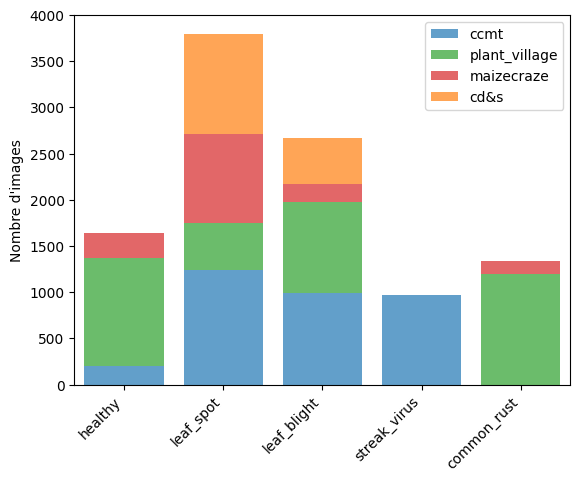

In [58]:
# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:green", "tab:red", "tab:orange"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/corn_dataset.png", dpi=300, bbox_inches="tight")

In [60]:
# Random number generator
rng = np.random.default_rng(3456789012)

size = 10

path = pathlib.Path("corn")

colors = {
    "ccmt": "tab:blue",
    "plant_village": "tab:green",
    "maizecraze": "tab:red",
    "cd&s": "tab:orange",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15), layout="tight")
    subset = dataset.loc[dataset["class"] == cls]
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)

        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"analyse/corn_sample_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

### 3.7 - Séparation du dataset d'entraînement de test

In [57]:
# Random number generator
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("corn_dataset.csv", index_col=0)
dataset["subset"] = dataset["subset"].astype(str)
classes = dataset.columns.drop(["filename", "source"])

prop_test = 0.3

train_files, test_files = sklearn.model_selection.train_test_split(
    dataset["filename"],
    test_size=prop_test,
    shuffle=True,
    random_state=432109765,
    stratify=dataset.drop("filename", axis=1),
)

dataset.loc[dataset["filename"].isin(train_files), "subset"] = "train"
dataset.loc[dataset["filename"].isin(test_files), "subset"] = "test"

train_dataset = dataset.query("subset == 'train'")
test_dataset = dataset.query("subset == 'test'")
test_dataset

,filename,source,subset,class
10,healthy10_.jpg,ccmt,test,healthy
13,healthy113_.jpg,ccmt,test,healthy
19,healthy116_.jpg,ccmt,test,healthy
20,healthy11_.jpg,ccmt,test,healthy
21,healthy119_.jpg,ccmt,test,healthy
...,...,...,...,...
10442,nls_413.jpg,cd&s,test,leaf_spot
10444,nls_416.jpg,cd&s,test,leaf_spot
10445,nls_417.jpg,cd&s,test,leaf_spot
10446,nls_418.jpg,cd&s,test,leaf_spot


In [58]:
# Export to csv
dataset.to_csv("corn_dataset.csv")

dataset

,filename,source,subset,class
0,healthy100_.jpg,ccmt,train,healthy
1,healthy102_.jpg,ccmt,train,healthy
2,healthy101_.jpg,ccmt,train,healthy
3,healthy103_.jpg,ccmt,train,healthy
4,healthy104_.jpg,ccmt,train,healthy
...,...,...,...,...
10447,nls_419.jpg,cd&s,test,leaf_spot
10448,nls_420.jpg,cd&s,train,leaf_spot
10449,nls_421.jpg,cd&s,train,leaf_spot
10450,nls_422.jpg,cd&s,train,leaf_spot


## 4 - Patate

### 4.1 - Plant Village

In [40]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
]

source_classes = [
    "Potato___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
]


# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantvillage_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/plantvillage dataset/color/")
dest = pathlib.Path("potato")

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {"filename": filenames, "source": "plant_village", "subset": None, "class": c},
    )

    plantvillage_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantvillage_dataset = pd.concat(plantvillage_dataset, ignore_index=True)
plantvillage_dataset

,filename,source,subset,class
0,00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL_1...,plant_village,None,healthy
1,03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL_1...,plant_village,None,healthy
2,04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL_1...,plant_village,None,healthy
3,046641c1-f837-49eb-b5f2-4109910a027c___RS_HL_1...,plant_village,None,healthy
4,07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL_5...,plant_village,None,healthy
...,...,...,...,...
2147,fe9d57f1-8e00-4069-963a-b344cceca7b3___RS_LB_4...,plant_village,None,late_blight
2148,feefc118-4434-4ffb-afbb-02fb292f72b6___RS_LB_2...,plant_village,None,late_blight
2149,ff03a125-445b-40e1-a7ed-0bb9b155dfd8___RS_LB_5...,plant_village,None,late_blight
2150,ff7160f9-f8d7-4576-82b8-009bf1b63b3b___RS_LB_4...,plant_village,None,late_blight


### 4.2 - NZDL Plant Disease Dataset v2

In [41]:
# Classes
classes = [
    "early_blight",
    "healthy",
    "late_blight"
]

source_classes = [
    "Po_ear_blight",
    "Po_healthy_l",
    "Po_lt_blight",
]

# On ajoute les images RAW du CCMT
source = pathlib.Path(
    "../data/NZDLPlantDiseaseDatasetV2/"
)

dest = pathlib.Path("potato")

sets = ["test", "train", "valid"]

nzdl_dataset = []

for c, sc in zip(classes, source_classes):
    for st in sets:
        # Liste des fichiers, et on enlève les "_" car ce sont des images augmentées
        files = [f for f in list((source / st / sc / "original").iterdir()) if f.suffix == ".jpg"]
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {"filename": filenames, "source": "nzdl", "subset": None, "class": c},
        )

        nzdl_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))

nzdl_dataset = pd.concat(nzdl_dataset, ignore_index=True)
nzdl_dataset

,filename,source,subset,class
0,Po_ear_blight_(2723).jpg,nzdl,None,early_blight
1,Po_ear_blight_(2724).jpg,nzdl,None,early_blight
2,Po_ear_blight_(2726).jpg,nzdl,None,early_blight
3,Po_ear_blight_(2727).jpg,nzdl,None,early_blight
4,Po_ear_blight_(2730).jpg,nzdl,None,early_blight
...,...,...,...,...
370,Po_lt_blight_(653).jpg,nzdl,None,late_blight
371,Po_lt_blight_(654).jpg,nzdl,None,late_blight
372,Po_lt_blight_(655).jpg,nzdl,None,late_blight
373,Po_lt_blight_(656).jpg,nzdl,None,late_blight


### 4.3 - Création du dataset

In [42]:
# Concaténation des dataframes
dataset = [plantvillage_dataset, nzdl_dataset]

dataset = pd.concat(dataset, axis=0, ignore_index=True)
dataset

,filename,source,subset,class
0,00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL_1...,plant_village,None,healthy
1,03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL_1...,plant_village,None,healthy
2,04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL_1...,plant_village,None,healthy
3,046641c1-f837-49eb-b5f2-4109910a027c___RS_HL_1...,plant_village,None,healthy
4,07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL_5...,plant_village,None,healthy
...,...,...,...,...
2522,Po_lt_blight_(653).jpg,nzdl,None,late_blight
2523,Po_lt_blight_(654).jpg,nzdl,None,late_blight
2524,Po_lt_blight_(655).jpg,nzdl,None,late_blight
2525,Po_lt_blight_(656).jpg,nzdl,None,late_blight


On s'assure maintenant que le dossier "potato" contient bien toutes les images du dataset,
et uniquement les images du dataset.

In [43]:
## On enlève les images du dossier qui ne sont plus dans le dataset
dataset_path = pathlib.Path("potato")
dataset_files = dataset["filename"].values

for file in dataset_path.iterdir():
    if file.name not in dataset_files:
        file.unlink()

In [44]:
# On vérifie si toutes les images du dataset sont présentes dans le dossier
for file in dataset["filename"]:
    absent_files = []
    if not (dataset_path / file).exists():
        absent_files.append(file)

absent_files

[]

In [45]:
# On retire les images qui ne peuvent pas être ouvertes
import PIL.Image

to_remove = []
for file in dataset["filename"]:
    try:
        PIL.Image.open(dataset_path / file).convert("RGB")
    except:
        to_remove.append(file)
        if (dataset_path / file).exists():
            (dataset_path / file).unlink()

dataset = dataset.loc[~dataset["filename"].isin(to_remove)]
len(to_remove)

0

In [46]:
# On exporte le dataset
dataset.to_csv("potato_dataset.csv")
dataset

,filename,source,subset,class
0,00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL_1...,plant_village,None,healthy
1,03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL_1...,plant_village,None,healthy
2,04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL_1...,plant_village,None,healthy
3,046641c1-f837-49eb-b5f2-4109910a027c___RS_HL_1...,plant_village,None,healthy
4,07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL_5...,plant_village,None,healthy
...,...,...,...,...
2522,Po_lt_blight_(653).jpg,nzdl,None,late_blight
2523,Po_lt_blight_(654).jpg,nzdl,None,late_blight
2524,Po_lt_blight_(655).jpg,nzdl,None,late_blight
2525,Po_lt_blight_(656).jpg,nzdl,None,late_blight


### 4.4 - Analyse du dataset

In [47]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("potato_dataset.csv", index_col=0)
dataset

,filename,source,subset,class
0,00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL_1...,plant_village,NaN,healthy
1,03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL_1...,plant_village,NaN,healthy
2,04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL_1...,plant_village,NaN,healthy
3,046641c1-f837-49eb-b5f2-4109910a027c___RS_HL_1...,plant_village,NaN,healthy
4,07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL_5...,plant_village,NaN,healthy
...,...,...,...,...
2522,Po_lt_blight_(653).jpg,nzdl,NaN,late_blight
2523,Po_lt_blight_(654).jpg,nzdl,NaN,late_blight
2524,Po_lt_blight_(655).jpg,nzdl,NaN,late_blight
2525,Po_lt_blight_(656).jpg,nzdl,NaN,late_blight


In [48]:
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()

sources = ["plant_village", "nzdl"]

counts = (
    dataset[["source", "class"]]
    .groupby("source")
    .value_counts()
    .unstack(1, fill_value=0)
    .loc[sources, classes]
)
counts

class,healthy,early_blight,late_blight
source,,,
plant_village,152,1000,1000
nzdl,199,119,57


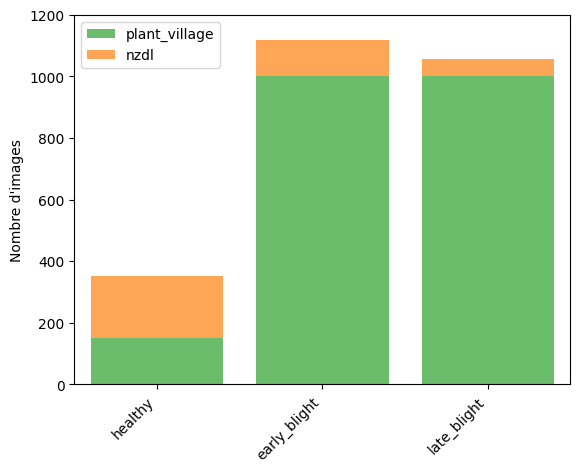

In [49]:
# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:green", "tab:orange"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/potato_dataset.png", dpi=300, bbox_inches="tight")

In [51]:
# Random number generator
rng = np.random.default_rng(3456789012)

size = 10

path = pathlib.Path("potato")

colors = {
    "plant_village": "tab:green",
    "nzdl": "tab:orange",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15), layout="tight")
    subset = dataset.loc[dataset["class"] == cls]
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)

        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"analyse/potato_sample_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

### 4.4 - Séparation du dataset d'entraînement de test

In [52]:
# Random number generator
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("potato_dataset.csv", index_col=0)
dataset["subset"] = dataset["subset"].astype(str)
classes = dataset.columns.drop(["filename", "source"])

prop_test = 0.3

train_files, test_files = sklearn.model_selection.train_test_split(
    dataset["filename"],
    test_size=prop_test,
    shuffle=True,
    random_state=432109765,
    stratify=dataset.drop("filename", axis=1),
)

dataset.loc[dataset["filename"].isin(train_files), "subset"] = "train"
dataset.loc[dataset["filename"].isin(test_files), "subset"] = "test"

train_dataset = dataset.query("subset == 'train'")
test_dataset = dataset.query("subset == 'test'")
test_dataset

,filename,source,subset,class
4,07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL_5...,plant_village,test,healthy
5,0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL_1...,plant_village,test,healthy
10,142fb983-2166-4a0f-b99b-a6c21e99987e___RS_HL_5...,plant_village,test,healthy
11,14484ea5-9c34-427c-abe4-2743265aced0___RS_HL_4...,plant_village,test,healthy
13,163ada72-4288-4f85-a3c1-feed23c8d1de___RS_HL_1...,plant_village,test,healthy
...,...,...,...,...
2505,Po_lt_blight_(693).jpg,nzdl,test,late_blight
2515,Po_lt_blight_(703).jpg,nzdl,test,late_blight
2516,Po_lt_blight_(704).jpg,nzdl,test,late_blight
2517,Po_lt_blight_(646).jpg,nzdl,test,late_blight


In [54]:
# Export to csv
dataset.to_csv("potato_dataset.csv")

dataset

,filename,source,subset,class
0,00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL_1...,plant_village,train,healthy
1,03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL_1...,plant_village,train,healthy
2,04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL_1...,plant_village,train,healthy
3,046641c1-f837-49eb-b5f2-4109910a027c___RS_HL_1...,plant_village,train,healthy
4,07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL_5...,plant_village,test,healthy
...,...,...,...,...
2522,Po_lt_blight_(653).jpg,nzdl,train,late_blight
2523,Po_lt_blight_(654).jpg,nzdl,train,late_blight
2524,Po_lt_blight_(655).jpg,nzdl,train,late_blight
2525,Po_lt_blight_(656).jpg,nzdl,train,late_blight
